In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Loading Dataset
meta_data = pd.read_csv("HAM10000_metadata.csv")

# Getting Labels
all_labels = meta_data['dx']
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
meta_attributes = meta_data[["dx_type", "age", "sex", "localization"]]

# missing value remove
imputer = SimpleImputer(strategy='most_frequent')
for col in meta_attributes.columns:
    print(f"{col=}")
    meta_attributes[col] = imputer.fit_transform(meta_attributes[[col]]).ravel()

categorical_columns = meta_attributes.select_dtypes(include=['object']).columns
print(f"{categorical_columns=}")
# label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    meta_attributes[col] = le.fit_transform(meta_attributes.loc[:,col])
    # label_encoders[col] = le

print(f"{meta_attributes=}")
# image_name = meta_data['image_id']

# df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")
# df_with_meta = pd.concat([df_without_label, meta_attributes], axis=1)
# print(f"{df_with_meta=}")
# pixel_columns = df_without_label.columns

cancer_count = sum(labels == True)
noncancer_count = sum(labels == False)
print("Cancer Instances:", cancer_count)
print("Non-Cancer Instances:", noncancer_count)
# df

col='dx_type'
col='age'
col='sex'
col='localization'
categorical_columns=Index(['dx_type', 'sex', 'localization'], dtype='object')
meta_attributes=       dx_type   age  sex  localization
0            3  80.0    1            11
1            3  80.0    1            11
2            3  80.0    1            11
3            3  80.0    1            11
4            3  75.0    1             4
...        ...   ...  ...           ...
10010        3  40.0    1             0
10011        3  40.0    1             0
10012        3  40.0    1             0
10013        3  80.0    1             5
10014        3  70.0    0             2

[10015 rows x 4 columns]
Cancer Instances: 1954
Non-Cancer Instances: 8061


C:\Users\DELL\AppData\Local\Temp\ipykernel_11004\2783317253.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_attributes[col] = imputer.fit_transform(meta_attributes[[col]]).ravel()
C:\Users\DELL\AppData\Local\Temp\ipykernel_11004\2783317253.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_attributes[col] = imputer.fit_transform(meta_attributes[[col]]).ravel()
C:\Users\DELL\AppData\Local\Temp\ipykernel_11004\2783317253.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of

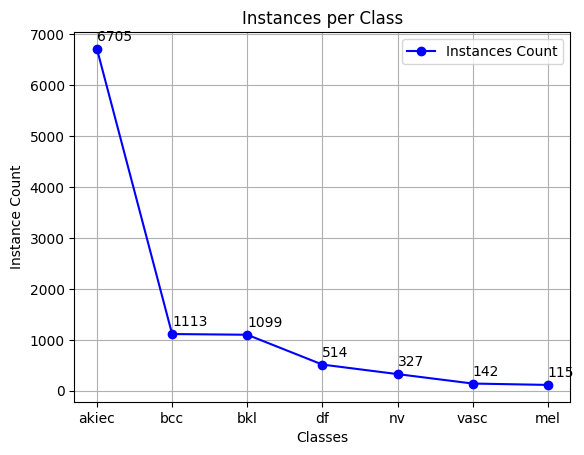

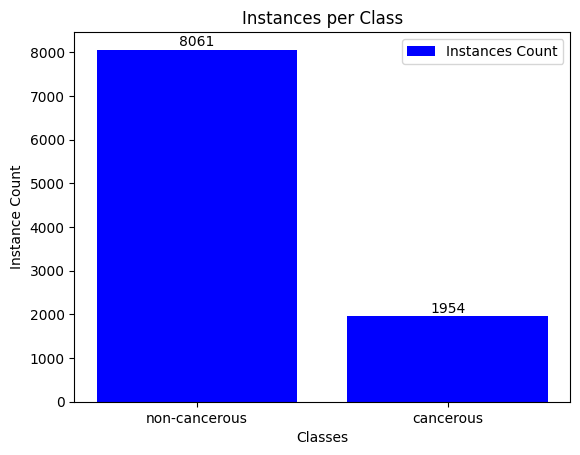

In [2]:
unique_classes_count = all_labels.value_counts()
unique_classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
plt.plot(unique_classes,
         unique_classes_count, marker='o', linestyle='-', color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+100, f'{y_coord}', ha='left', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(True)
plt.show()

unique_classes_count = [noncancer_count, cancer_count]
unique_classes = ['non-cancerous', 'cancerous']
plt.bar(unique_classes,
        [noncancer_count, cancer_count], color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+20, f'{y_coord}', ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(False)
plt.show()

In [4]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = [], [], [], []
# print(f"{meta_attributes=}")
for train_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=56).split(meta_attributes, labels):
    print(f"{meta_attributes=}")
    X_train, X_test, y_train, y_test = meta_attributes.iloc[
        train_index], meta_attributes.iloc[test_index], labels[train_index], labels[test_index]
    print(f"{X_train=}")
# print(f"{train_index=}")
# print(f"{test_index=}")


def calc_Confusion_Matrix(model):
    print(f"{X_train=}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)


confusion_matrices = []
roc_auc_arr = []


meta_attributes=       dx_type   age  sex  localization
0            3  80.0    1            11
1            3  80.0    1            11
2            3  80.0    1            11
3            3  80.0    1            11
4            3  75.0    1             4
...        ...   ...  ...           ...
10010        3  40.0    1             0
10011        3  40.0    1             0
10012        3  40.0    1             0
10013        3  80.0    1             5
10014        3  70.0    0             2

[10015 rows x 4 columns]
X_train=      dx_type   age  sex  localization
2827        3  70.0    0            14
203         3  45.0    0             5
2613        3  65.0    1             5
7539        3  40.0    1             3
3807        2  60.0    1             9
...       ...   ...  ...           ...
6208        2  30.0    0             9
3530        2  40.0    0             9
2287        3  65.0    1            14
4942        2  45.0    0            14
4079        2  60.0    0             9

[

In [5]:
confusion_matrices.append(calc_Confusion_Matrix(svm.SVC()))
display(confusion_matrices[0])

X_train=      dx_type   age  sex  localization
2827        3  70.0    0            14
203         3  45.0    0             5
2613        3  65.0    1             5
7539        3  40.0    1             3
3807        2  60.0    1             9
...       ...   ...  ...           ...
6208        2  30.0    0             9
3530        2  40.0    0             9
2287        3  65.0    1            14
4942        2  45.0    0            14
4079        2  60.0    0             9

[8012 rows x 4 columns]


array([[1612,    0],
       [ 391,    0]], dtype=int64)

In [6]:
confusion_matrices.append(calc_Confusion_Matrix(RandomForestClassifier()))
display(confusion_matrices[1])


X_train=      dx_type   age  sex  localization
2827        3  70.0    0            14
203         3  45.0    0             5
2613        3  65.0    1             5
7539        3  40.0    1             3
3807        2  60.0    1             9
...       ...   ...  ...           ...
6208        2  30.0    0             9
3530        2  40.0    0             9
2287        3  65.0    1            14
4942        2  45.0    0            14
4079        2  60.0    0             9

[8012 rows x 4 columns]


array([[1477,  135],
       [ 218,  173]], dtype=int64)

In [7]:
confusion_matrices.append(calc_Confusion_Matrix(
    LogisticRegression()))
display(confusion_matrices[2])



X_train=      dx_type   age  sex  localization
2827        3  70.0    0            14
203         3  45.0    0             5
2613        3  65.0    1             5
7539        3  40.0    1             3
3807        2  60.0    1             9
...       ...   ...  ...           ...
6208        2  30.0    0             9
3530        2  40.0    0             9
2287        3  65.0    1            14
4942        2  45.0    0            14
4079        2  60.0    0             9

[8012 rows x 4 columns]


array([[1481,  131],
       [ 228,  163]], dtype=int64)

In [8]:
confusion_matrices.append(calc_Confusion_Matrix(XGBClassifier()))
display(confusion_matrices[3])

X_train=      dx_type   age  sex  localization
2827        3  70.0    0            14
203         3  45.0    0             5
2613        3  65.0    1             5
7539        3  40.0    1             3
3807        2  60.0    1             9
...       ...   ...  ...           ...
6208        2  30.0    0             9
3530        2  40.0    0             9
2287        3  65.0    1            14
4942        2  45.0    0            14
4079        2  60.0    0             9

[8012 rows x 4 columns]


array([[1481,  131],
       [ 220,  171]], dtype=int64)

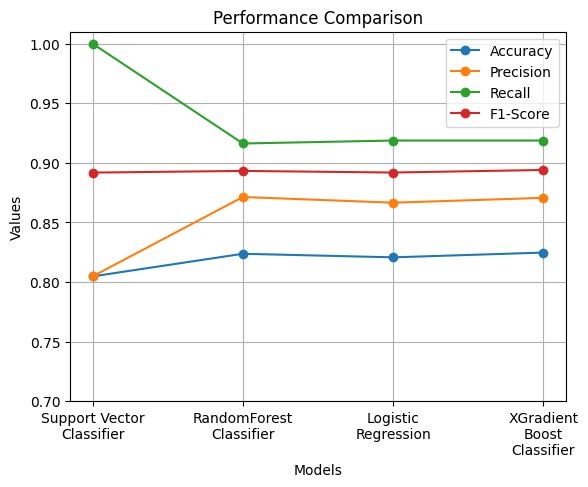

In [9]:
accuracies = [(score[0][0]+score[1][1])/(score[0][0]+score[0]
                                         [1]+score[1][0]+score[1][1]) for score in confusion_matrices]
precisions = [score[0][0]/(score[0][0]+score[1][0])
              for score in confusion_matrices]
recalls = [score[0][0]/(score[0][0]+score[0][1])
           for score in confusion_matrices]
f1scores = [2*p*r/(p+r) for p, r in zip(precisions, recalls)]
models = ['Support Vector\nClassifier', 'RandomForest\nClassifier',
          'Logistic\nRegression', 'XGradient\nBoost\nClassifier']
plt.plot(models, accuracies, marker='o', linestyle='-', label="Accuracy")
# def plot_labels(models, accuracies):
#     for x_coord, y_coord in zip(models, accuracies):
#         plt.text(x_coord, y_coord, "%.2f" % y_coord, ha='left', va='bottom')
# plot_labels(models, accuracies)
plt.plot(models, precisions, marker='o', linestyle='-', label="Precision")
# plot_labels(models, precisions)
plt.plot(models, recalls, marker='o', linestyle='-', label="Recall")
# plot_labels(models, recalls)
plt.plot(models, f1scores, marker='o', linestyle='-', label="F1-Score")
# plot_labels(models, f1scores)
# plt.plot(models, auc_roc_scores, label ="AUC-ROC")
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Performance Comparison')
plt.legend(loc='upper right')
plt.ylim(0.7, 1.01)
plt.grid(True)
plt.show()
